<a href="https://colab.research.google.com/github/sunxueliang96/WF-FrameWork/blob/master/Data%20Augmented/multiple_technologies/analysis%26result_wakie_Closed_World_NoDef.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mount Google Drive as folder
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#cd /content/drive/'My Drive'/datasets/no_paded/open_world/walkiebatch


In [0]:
#datatype_Close = False   #Flase is Open_World, True is Closed World.

In [3]:
cd /content/drive/'My Drive'/datasets/no_paded/close_world/walkiebatch

/content/drive/My Drive/datasets/no_paded/close_world/walkiebatch


In [0]:
datatype_Close = True   #Flase is Open_World, True is Closed World.

In [5]:
ls

LOCALLY_CHANGE_historys_CNN_NB_TIMES.pkl
LOCALLY_CHANGE_historys_CNN_PERCENT_CHANGED.pkl
LOCALLY_CHANGE_historys_DNN_NB_TIMES.pkl
LOCALLY_CHANGE_historys_DNN_PERCENT_CHANGED.pkl
NOISE_ADDED_historys_CNN_NB_TIMES.pkl
NOISE_ADDED_historys_CNN_PERCENT_NOISE.pkl
NOISE_ADDED_historys_DNN_NB_TIMES.pkl
NOISE_ADDED_historys_DNN_PERCENT_NOISE.pkl
RANDOM_DELETE_historys_CNN_NB_TIMES.pkl
RANDOM_DELETE_historys_CNN_PERCENT_CHANGED.pkl
RANDOM_DELETE_historys_DNN_NB_TIMES.pkl
RANDOM_DELETE_historys_DNN_PERCENT_CHANGED.pkl
X_walkiebatch.pkl
y_walkiebatch.pkl


In [6]:
import numpy as np
import pickle

print('loading data...')
with open('X_walkiebatch.pkl','rb') as handle:
  X = np.array(pickle.load(handle))
with open('y_walkiebatch.pkl','rb') as handle:
  y = np.array(pickle.load(handle))
print('the shape of X',X.shape)
print('the shape of y',y.shape)


loading data...
the shape of X (11868,)
the shape of y (11868,)


In [0]:
import math 
import random
def fun_noise(X,y,PERCENT_NOISE,TIMES_NOISE): 
    X = list(X)
    y = list(y)
    X_sum = []
    y_sum = []
    #X_sum = X.copy()
    #y_sum = y.copy()
    #print("{} samples has beed add to X_train, {}% of noise for each sample".format(math.ceil(len(X)*TIMES_NOISE),PERCENT_NOISE))
    for i in range(math.ceil(len(X)*TIMES_NOISE)): #ADDING NOISE from here 
        while(True):
            p = random.choice(range(len(X)))
            if(y[p]!=-1):
                break
            else:
                pass
        X_new = X[p].copy()
        y_new = y[p]
        for n in range(math.ceil(PERCENT_NOISE*len(X_new)/100)):#dealing X_new
            noise = random.choice([1,-1])       #noise could only be 1 or -1
            pos = random.choice(range(len(X_new)))  #position belong to (0,len(sequence))
            X_new.insert(pos,noise)
            #print('insert {} at position {} in sequence {} now len of sequence is {}, the tag of sequence is {}'.format(noise,pos,p,len(X_new),y_new)) #for test
        X_sum.append(X_new)
        y_sum.append(y_new)
    return X_sum,y_sum
def fun_delete(X,y,PERCENT_DELETE,TIMES_DELETE): 
    X = list(X)
    y = list(y)
    X_sum = []
    y_sum = []
    #X_sum = X.copy()
    #y_sum = y.copy()

    for i in range(math.ceil(len(X)*TIMES_DELETE)): #RANDOM DELETE from here
        while(True):
            p = random.choice(range(len(X)))
            if(y[p]!=-1):
                break
            else:
                #print('-1 detected')
                pass
        X_new = X[p].copy()
        y_new = y[p]
        for n in range(math.ceil(PERCENT_DELETE*len(X_new)/100)):#dealing X_new
            pos = random.choice(range(len(X_new)))  #position belong to (0,len(sequence))
            del X_new[pos]
            #print('insert {} at position {} in sequence {} now len of sequence is {}'.format(noise,pos,p,len(X_new))) #for test
        X_sum.append(X_new)
        y_sum.append(y_new)
    return X_sum,y_sum
def fun_shuffle(X,y,PERCENT_CHANGED,TIMES_SHUFFLE): 
    X = list(X)
    y = list(y)
    #X_sum = X.copy()
    #y_sum = y.copy()
    X_sum = []
    y_sum = []
    for i in range(math.ceil(len(X)*TIMES_SHUFFLE)):             #LOCALLY CHANGE from here
        while(True):
            p = random.choice(range(len(X)))
            if(y[p]!=-1):
                break
            else:
                #print('-1 detected')
                pass
        X_new = X[p].copy()
        y_new = y[p]
        length = math.ceil(PERCENT_CHANGED*len(X_new)/100)
        start = random.choice(range(len(X_new)-length))
        temp = X_new[start:start+length]
        random.shuffle(temp)
        X_new[start:start+length] = temp

        X_sum.append(X_new)
        y_sum.append(y_new)
    return X_sum,y_sum
def fun_transplant(X,y,PERCENT_TRANSPLANT,NB_TIMES):        #Magnificate dataset by adding noising randomly
    global datatype_Close
    X = list(X)
    y = list(y)
    X_sum = []
    y_sum = []
    #X_sum = X.copy()
    #y_sum = y.copy()
    #print("{} samples has beed add to X_train, {}% of noise for each sample".format(math.ceil(len(X)*NB_TIMES),PERCENT_TRANSPLANT))
    for i in range(math.ceil(len(X)*NB_TIMES)):
        #print(datatype_Close)    
        while(datatype_Close):                               # target pos p (sensitive website), pos q (non-sensitive website)
            p = random.choice(range(len(X)))
            q = random.choice(range(len(X)))
            if(p != q):                           # Closed_World
                break
            else:
                #print('-1 detected')
                pass
        while(not datatype_Close):                               # target pos p (sensitive website), pos q (non-sensitive website)
            p = random.choice(range(len(X)))
            q = random.choice(range(len(X)))
            if(y[p]!=-1 and y[q]==-1):               # open_world
                break
            else:
                #print('-1 detected')
                pass
        X_new = X[p].copy()
        target = X[q].copy()
        y_new = y[p]

        length_X = math.ceil(PERCENT_TRANSPLANT*len(X_new)/100)
        length_target =  math.ceil(PERCENT_TRANSPLANT*len(target)/100)
        start_X = random.choice(range(len(X_new)-length_X))
        start_target = random.choice(range(len(target)-length_target))
        temp = target[start_target:start_target+length_target]
        X_new[start_X:start_X+length_X] = temp
     
        X_sum.append(X_new)
        y_sum.append(y_new)
    return X_sum,y_sum
'''
def random_launch(X,y,NB_tech):
    X = list(X)
    y = list(y)
    X_sum = X.copy()
    y_sum = y.copy()
    launch_list = random.sample(range(4),NB_tech)             #return [0,1,....]....depending on NB_tech
    for i in launch_list:
        if (i==0):
            print('adding noise...')
            X_new,y_new = fun_noise(X,y,PERCENT_NOISE=20,TIMES_NOISE=0.4)
            X_sum.extend(X_new)
            y_sum.extend(y_new)
        if (i==1):
            print('deleting...')
            X_new,y_new = fun_delete(X,y,PERCENT_DELETE=20,TIMES_DELETE=0.4)
            X_sum.extend(X_new)
            y_sum.extend(y_new)
        if (i==2):
            print('shuffling...')
            X_new,y_new = fun_shuffle(X,y,PERCENT_CHANGED=20,TIMES_SHUFFLE=0.4)
            X_sum.extend(X_new)
            y_sum.extend(y_new)
        if (i==3):
            print('transplanting...')
            X_new,y_new = fun_transplant(X,y,PERCENT_TRANSPLANT=20,NB_TIMES=0.4)
            X_sum.extend(X_new)
            y_sum.extend(y_new)
    return np.array(X_sum),np.array(y_sum)                        #return two array of X, y 
    '''
def random_launch(X,y,NB_tech):
    X = list(X)
    y = list(y)
    X_sum = X.copy()
    y_sum = y.copy()
    launch_list = random.sample(range(4),NB_tech)             #return [0,1,....]....depending on NB_tech
    for i in launch_list:
        if (i==0):
            print('adding noise...')
            X_new,y_new = fun_noise(X,y,PERCENT_NOISE=50,TIMES_NOISE=1)
            X_sum.extend(X_new)
            y_sum.extend(y_new)
        if (i==1):
            print('deleting...')
            X_new,y_new = fun_delete(X,y,PERCENT_DELETE=50,TIMES_DELETE=1)
            X_sum.extend(X_new)
            y_sum.extend(y_new)
        if (i==2):
            print('shuffling...')
            X_new,y_new = fun_shuffle(X,y,PERCENT_CHANGED=50,TIMES_SHUFFLE=1)
            X_sum.extend(X_new)
            y_sum.extend(y_new)
        if (i==3):
            print('transplanting...')
            X_new,y_new = fun_transplant(X,y,PERCENT_TRANSPLANT=50,NB_TIMES=1)
            X_sum.extend(X_new)
            y_sum.extend(y_new)
    return np.array(X_sum),np.array(y_sum)                        #return two array of X, y 

In [8]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.preprocessing import sequence
from collections import Counter
#CLASSES_KNN = 101########################################################################################################################################################################################################
#CLASSES_WAKIE = 100########################################################################################################################################################################################################
MAXLEN_KNN = 2000
MAXLEN_WAKIE =5000

maxlen = 5000
NB_CLASSES = 0

def choose():
    global maxlen,NB_CLASSES
    print('if padding, the max of length of seq is {}'.format(maxlen))
    NB_CLASSES = len(Counter(y).keys())
    print('number of classes is {}'.format(NB_CLASSES))

choose()################################################################################################################################################################################################################

print('Average sequence length: {}'.format(np.mean(list(map(len, X)), dtype=int)))


Using TensorFlow backend.


if padding, the max of length of seq is 5000
number of classes is 108
Average sequence length: 4471


In [0]:
#FCN
from keras import Sequential
from keras.layers.core import Activation, Flatten, Dense, Dropout
from keras.optimizers import Adamax
def DNN(input_shape,classes):
    model = Sequential()
    model.add(Dense(128, input_shape=(input_shape,)))
    model.add(Activation('relu'))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(Dense(512))
    model.add(Dropout(0.5))
    model.add(Activation('relu'))
    model.add(Dense(classes))
    model.add(Activation('softmax'))
    return model


In [0]:
#CNN
from keras import Input,Model,Sequential
from keras.layers import Embedding,GlobalAveragePooling1D,Dense,Dropout
from keras.layers import Conv1D, MaxPooling1D, BatchNormalization
from keras.layers.core import Activation, Flatten, Dense, Dropout
from keras.layers.advanced_activations import ELU
from keras.initializers import glorot_uniform
from keras.optimizers import Adamax
def CNN(input_shape, classes):
    model = Sequential()
    #Block1
    filter_num = ['None',32,64,128,256]
    kernel_size = ['None',8,8,8,8]
    conv_stride_size = ['None',1,1,1,1]
    pool_stride_size = ['None',4,4,4,4]
    pool_size = ['None',8,8,8,8]

    model.add(Conv1D(filters=filter_num[1], kernel_size=kernel_size[1], input_shape=(input_shape,1),
                      strides=conv_stride_size[1], padding='same',
                      name='block1_conv1'))
    model.add(BatchNormalization(axis=-1))
    model.add(ELU(alpha=1.0, name='block1_adv_act1'))
    model.add(Conv1D(filters=filter_num[1], kernel_size=kernel_size[1],
                      strides=conv_stride_size[1], padding='same',
                      name='block1_conv2'))
    model.add(BatchNormalization(axis=-1))
    model.add(ELU(alpha=1.0, name='block1_adv_act2'))
    model.add(MaxPooling1D(pool_size=pool_size[1], strides=pool_stride_size[1],
                            padding='same', name='block1_pool'))
    model.add(Dropout(0.1, name='block1_dropout'))

    model.add(Conv1D(filters=filter_num[2], kernel_size=kernel_size[2],
                      strides=conv_stride_size[2], padding='same',
                      name='block2_conv1'))
    model.add(BatchNormalization())
    model.add(Activation('relu', name='block2_act1'))

    model.add(Conv1D(filters=filter_num[2], kernel_size=kernel_size[2],
                      strides=conv_stride_size[2], padding='same',
                      name='block2_conv2'))
    model.add(BatchNormalization())
    model.add(Activation('relu', name='block2_act2'))
    model.add(MaxPooling1D(pool_size=pool_size[2], strides=pool_stride_size[3],
                            padding='same', name='block2_pool'))
    model.add(Dropout(0.1, name='block2_dropout'))

    model.add(Conv1D(filters=filter_num[3], kernel_size=kernel_size[3],
                      strides=conv_stride_size[3], padding='same',
                      name='block3_conv1'))
    model.add(BatchNormalization())
    model.add(Activation('relu', name='block3_act1'))
    model.add(Conv1D(filters=filter_num[3], kernel_size=kernel_size[3],
                      strides=conv_stride_size[3], padding='same',
                      name='block3_conv2'))
    model.add(BatchNormalization())
    model.add(Activation('relu', name='block3_act2'))
    model.add(MaxPooling1D(pool_size=pool_size[3], strides=pool_stride_size[3],
                            padding='same', name='block3_pool'))
    model.add(Dropout(0.1, name='block3_dropout'))

    model.add(Conv1D(filters=filter_num[4], kernel_size=kernel_size[4],
                      strides=conv_stride_size[4], padding='same',
                      name='block4_conv1'))
    model.add(BatchNormalization())
    model.add(Activation('relu', name='block4_act1'))
    model.add(Conv1D(filters=filter_num[4], kernel_size=kernel_size[4],
                      strides=conv_stride_size[4], padding='same',
                      name='block4_conv2'))
    model.add(BatchNormalization())
    model.add(Activation('relu', name='block4_act2'))
    model.add(MaxPooling1D(pool_size=pool_size[4], strides=pool_stride_size[4],
                            padding='same', name='block4_pool'))
    model.add(Dropout(0.1, name='block4_dropout'))

    model.add(Flatten(name='flatten'))
    model.add(Dense(512, kernel_initializer=glorot_uniform(seed=0), name='fc1'))
    model.add(BatchNormalization())
    model.add(Activation('relu', name='fc1_act'))

    model.add(Dropout(0.7, name='fc1_dropout'))

    model.add(Dense(512, kernel_initializer=glorot_uniform(seed=0), name='fc2'))
    model.add(BatchNormalization())
    model.add(Activation('relu', name='fc2_act'))

    model.add(Dropout(0.5, name='fc2_dropout'))

    model.add(Dense(classes, kernel_initializer=glorot_uniform(seed=0), name='fc3'))
    model.add(Activation('softmax', name="softmax"))
    return model

In [0]:
import keras
from keras import backend as K

def precision(y_true, y_pred):
    # Calculates the precision
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    # Calculates the recall
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def fbeta_score(y_true, y_pred, beta=1):
    # Calculates the F score, the weighted harmonic mean of precision and recall.
    if beta < 0:
        raise ValueError('The lowest choosable beta is zero (only precision).')
 
    # If there are no true positives, fix the F score at 0 like sklearn.
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    bb = beta ** 2
    fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
    return fbeta_score

def fmeasure(y_true, y_pred):
    # Calculates the f-measure, the harmonic mean of precision and recall.
    return fbeta_score(y_true, y_pred, beta=1)

In [12]:
#DNN               ############# test for noise adding  , function :: creat_data############

BATCH_SIZE = 64
NB_EPOCHS = 50
VALIDATION_SPLIT = 0.3

OPTIMIZER = Adamax()

historys_DNN = []
NB_tech = [4,4,4,4]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)


print('Pad sequences to ',maxlen)
print('ready for 4')
X_4,y_4 = random_launch(X_train,y_train,NB_tech[0])
X_4 = sequence.pad_sequences(X_4, maxlen=maxlen,padding='post',truncating='post')
y_4 = np_utils.to_categorical(y_4, NB_CLASSES)
'''
print('ready for 3')
X_3,y_3 = random_launch(X_train,y_train,NB_tech[1])
X_3 = sequence.pad_sequences(X_3, maxlen=maxlen,padding='post',truncating='post')
X_3 = X_3[:,:,np.newaxis]
y_3 = np_utils.to_categorical(y_3, NB_CLASSES)
print('ready for 2')
X_2,y_2 = random_launch(X_train,y_train,NB_tech[2])
X_2 = sequence.pad_sequences(X_2, maxlen=maxlen,padding='post',truncating='post')
X_2 = X_2[:,:,np.newaxis]
y_2 = np_utils.to_categorical(y_2, NB_CLASSES)
print('ready for 1')
X_1,y_1 = random_launch(X_train,y_train,NB_tech[3])
X_1 = sequence.pad_sequences(X_1, maxlen=maxlen,padding='post',truncating='post')
X_1 = X_1[:,:,np.newaxis]
y_1 = np_utils.to_categorical(y_1, NB_CLASSES)

'''
X_train = sequence.pad_sequences(X_train, maxlen=maxlen,padding='post',truncating='post')
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen,padding='post',truncating='post')
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

print('the shape of x_train',X_train.shape)
print('the shape of y_train',y_train.shape)
print('the shape of x_test',X_test.shape)
print('the shape of y_test',y_test.shape)

model_DNN = DNN(maxlen,NB_CLASSES)
model_DNN.summary()
model_DNN.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy', precision, recall, fmeasure])


history_DNN_loss = []
history_DNN_acc = []
history_DNN_precision = []
history_DNN_recall = []
history_DNN_fmeasure = []
history_DNN_val_loss = []
history_DNN_val_acc = []
history_DNN_val_precision = []
history_DNN_val_recall = []
history_DNN_val_fmeasure = []

def recorder_DNN(history):
    history_DNN_loss.append(history.history['loss'][0])
    history_DNN_acc.append(history.history['acc'][0])
    history_DNN_precision.append(history.history['precision'][0])
    history_DNN_recall.append(history.history['recall'][0])
    history_DNN_fmeasure.append(history.history['fmeasure'][0])
    history_DNN_val_loss.append(history.history['val_loss'][0])
    history_DNN_val_acc.append(history.history['val_acc'][0])
    history_DNN_val_precision.append(history.history['val_precision'][0])
    history_DNN_val_recall.append(history.history['val_recall'][0])
    history_DNN_val_fmeasure.append(history.history['val_fmeasure'][0])


for i in range(NB_EPOCHS):
    if (i<=NB_EPOCHS/5):
        history = model_DNN.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=1,validation_data=(X_test,y_test),verbose=1)
        recorder_DNN(history)
    elif (NB_EPOCHS/5<i and i%2==1 and i<(NB_EPOCHS*4/5)):
        history = model_DNN.fit(X_4,y_4,batch_size=BATCH_SIZE,epochs=1,validation_data=(X_test,y_test),verbose=1)
        recorder_DNN(history)
    elif (NB_EPOCHS/5<i and i%2==0 and i<(NB_EPOCHS*4/5)):
        history = model_DNN.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=1,validation_data=(X_test,y_test),verbose=1)
        recorder_DNN(history)
    else:
        history = model_DNN.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=1,validation_data=(X_test,y_test),verbose=1)
        recorder_DNN(history)

print('base_line_now#######################################################################################################################################################################################################')
model_DNN_org = DNN(maxlen,NB_CLASSES)
model_DNN_org.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy', precision, recall, fmeasure])
history_DNN_org = model_DNN_org.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=50,validation_data=(X_test,y_test),verbose=1)

Pad sequences to  5000
ready for 4
shuffling...
transplanting...
deleting...
adding noise...
the shape of x_train (8307, 5000)
the shape of y_train (8307, 108)
the shape of x_test (3561, 5000)
the shape of y_test (3561, 108)




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               640128    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
________________________________________

In [13]:
#CNN               ############# test for noise adding  , function :: creat_data############

BATCH_SIZE = 64
NB_EPOCHS = 50
VALIDATION_SPLIT = 0.3

OPTIMIZER = Adamax()

historys_DNN = []
NB_tech = [4,4,4,4]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)


print('Pad sequences to ',maxlen)
print('ready for 4')
X_4,y_4 = random_launch(X_train,y_train,NB_tech[0])
X_4 = sequence.pad_sequences(X_4, maxlen=maxlen,padding='post',truncating='post')
X_4 = X_4[:,:,np.newaxis]
y_4 = np_utils.to_categorical(y_4, NB_CLASSES)
'''
print('ready for 3')
X_3,y_3 = random_launch(X_train,y_train,NB_tech[1])
X_3 = sequence.pad_sequences(X_3, maxlen=maxlen,padding='post',truncating='post')
X_3 = X_3[:,:,np.newaxis]
y_3 = np_utils.to_categorical(y_3, NB_CLASSES)
print('ready for 2')
X_2,y_2 = random_launch(X_train,y_train,NB_tech[2])
X_2 = sequence.pad_sequences(X_2, maxlen=maxlen,padding='post',truncating='post')
X_2 = X_2[:,:,np.newaxis]
y_2 = np_utils.to_categorical(y_2, NB_CLASSES)
print('ready for 1')
X_1,y_1 = random_launch(X_train,y_train,NB_tech[3])
X_1 = sequence.pad_sequences(X_1, maxlen=maxlen,padding='post',truncating='post')
X_1 = X_1[:,:,np.newaxis]
y_1 = np_utils.to_categorical(y_1, NB_CLASSES)

'''
X_train = sequence.pad_sequences(X_train, maxlen=maxlen,padding='post',truncating='post')
X_train = X_train[:,:,np.newaxis]
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen,padding='post',truncating='post')
X_test = X_test[:,:,np.newaxis]

y_test = np_utils.to_categorical(y_test, NB_CLASSES)

print('the shape of x_train',X_train.shape)
print('the shape of y_train',y_train.shape)
print('the shape of x_test',X_test.shape)
print('the shape of y_test',y_test.shape)
model_CNN = CNN(maxlen,NB_CLASSES)
model_CNN.summary()
model_CNN.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy', precision, recall, fmeasure])




history_CNN_loss = []
history_CNN_acc = []
history_CNN_precision = []
history_CNN_recall = []
history_CNN_fmeasure = []
history_CNN_val_loss = []
history_CNN_val_acc = []
history_CNN_val_precision = []
history_CNN_val_recall = []
history_CNN_val_fmeasure = []

def recorder_CNN(history):
    history_CNN_loss.append(history.history['loss'][0])
    history_CNN_acc.append(history.history['acc'][0])
    history_CNN_precision.append(history.history['precision'][0])
    history_CNN_recall.append(history.history['recall'][0])
    history_CNN_fmeasure.append(history.history['fmeasure'][0])
    history_CNN_val_loss.append(history.history['val_loss'][0])
    history_CNN_val_acc.append(history.history['val_acc'][0])
    history_CNN_val_precision.append(history.history['val_precision'][0])
    history_CNN_val_recall.append(history.history['val_recall'][0])
    history_CNN_val_fmeasure.append(history.history['val_fmeasure'][0])


for i in range(NB_EPOCHS):
    if (i<=NB_EPOCHS/5):
        history = model_CNN.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=1,validation_data=(X_test,y_test),verbose=1)
        recorder_CNN(history)
    elif (NB_EPOCHS/5<i and i%2==1 and i<(NB_EPOCHS*4/5)):
        history = model_CNN.fit(X_4,y_4,batch_size=BATCH_SIZE,epochs=1,validation_data=(X_test,y_test),verbose=1)
        recorder_CNN(history)
    elif (NB_EPOCHS/5<i and i%2==0 and i<(NB_EPOCHS*4/5)):
        history = model_CNN.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=1,validation_data=(X_test,y_test),verbose=1)
        recorder_CNN(history)
    else:
        history = model_CNN.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=1,validation_data=(X_test,y_test),verbose=1)
        recorder_CNN(history)

print('base_line_now')
model_CNN_org = CNN(maxlen,NB_CLASSES)
model_CNN_org.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy', precision, recall, fmeasure])
history_CNN_org = model_CNN_org.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=50,validation_data=(X_test,y_test),verbose=1)

Pad sequences to  5000
ready for 4
deleting...
shuffling...
adding noise...
transplanting...
the shape of x_train (8307, 5000, 1)
the shape of y_train (8307, 108)
the shape of x_test (3561, 5000, 1)
the shape of y_test (3561, 108)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv1D)        (None, 5000, 32)          288       
_________________________________________________________________
batch_normalization_1 (Batch (None, 5000, 32)          128       
_________________________________________________________________
block1_adv_act1 (ELU)        (None, 5000, 32)          0         
_________________________________________________________________
block1_conv2 (Conv1D)        (None, 5000, 32)          8224      
_________________________________________________________________
batch_normalization_2 (Batch (None, 5000, 32)          128       
____________________

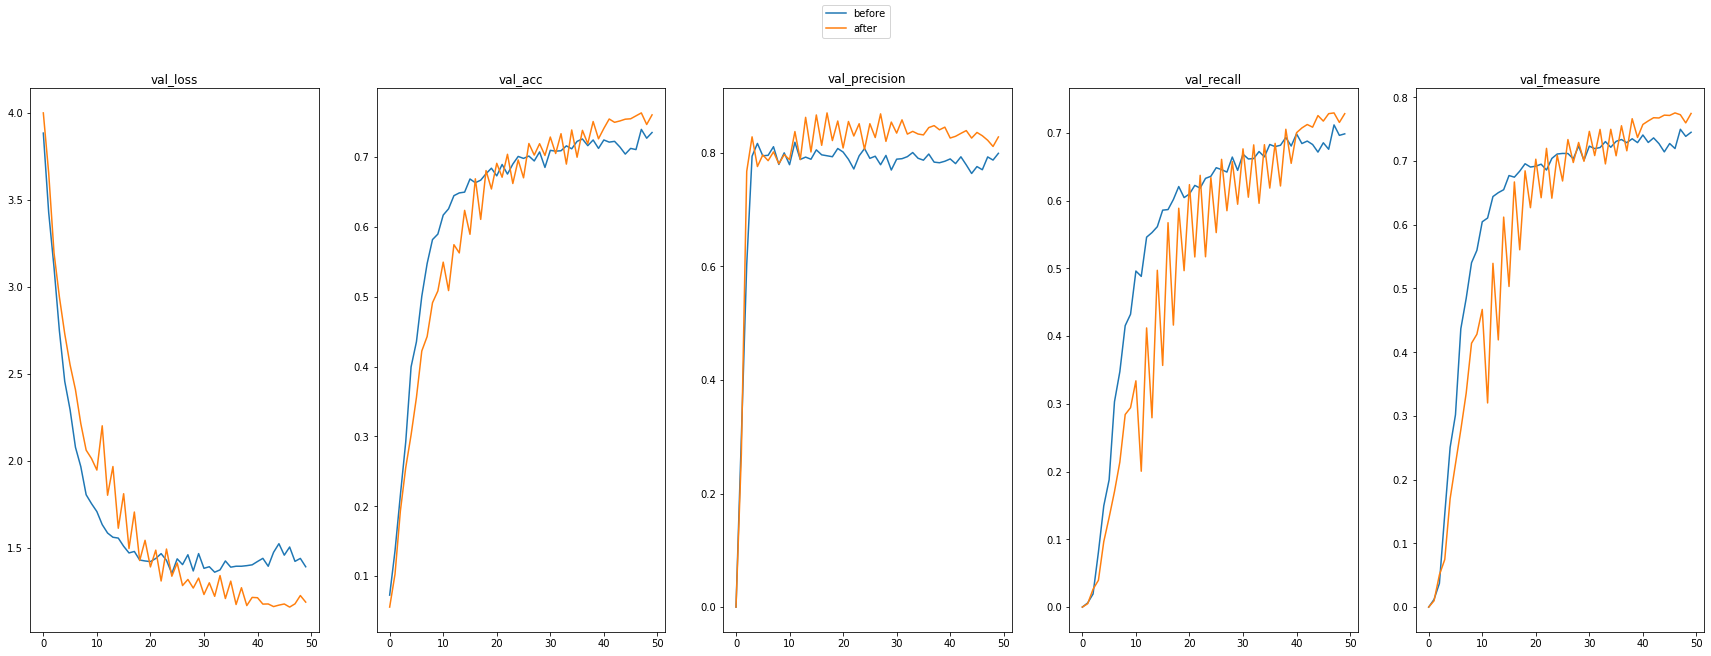

In [14]:
import matplotlib.pylab as plt


fig,axs = plt.subplots(1,5,figsize=(30,10))
axs[0].plot(range(NB_EPOCHS),history_DNN_org.history['val_loss'],label='before')
axs[0].plot(range(NB_EPOCHS),history_DNN_val_loss,label='after')
axs[0].set_title('val_loss')

axs[1].plot(range(NB_EPOCHS),history_DNN_org.history['val_acc'],label='before')
axs[1].plot(range(NB_EPOCHS),history_DNN_val_acc,label='after')
axs[1].set_title('val_acc')

axs[2].plot(range(NB_EPOCHS),history_DNN_org.history['val_precision'],label='before')
axs[2].plot(range(NB_EPOCHS),history_DNN_val_precision,label='after')
axs[2].set_title('val_precision')

axs[3].plot(range(NB_EPOCHS),history_DNN_org.history['val_recall'],label='before')
axs[3].plot(range(NB_EPOCHS),history_DNN_val_recall,label='after')
axs[3].set_title('val_recall')

axs[4].plot(range(NB_EPOCHS),history_DNN_org.history['val_fmeasure'],label='before')
axs[4].plot(range(NB_EPOCHS),history_DNN_val_fmeasure,label='after')
axs[4].set_title('val_fmeasure')

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')

plt.show()


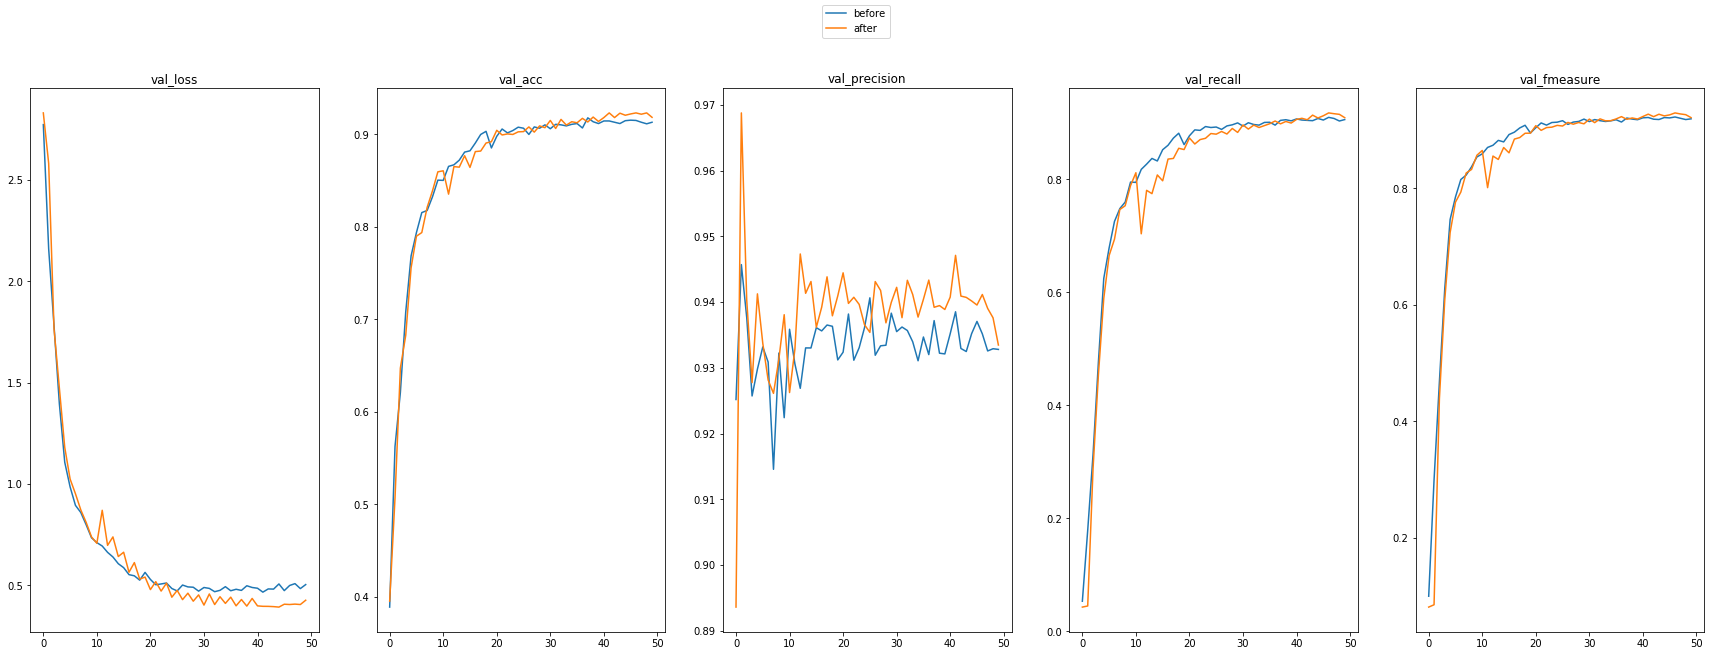

In [15]:
import matplotlib.pylab as plt


fig,axs = plt.subplots(1,5,figsize=(30,10))
axs[0].plot(range(NB_EPOCHS),history_CNN_org.history['val_loss'],label='before')
axs[0].plot(range(NB_EPOCHS),history_CNN_val_loss,label='after')
axs[0].set_title('val_loss')

axs[1].plot(range(NB_EPOCHS),history_CNN_org.history['val_acc'],label='before')
axs[1].plot(range(NB_EPOCHS),history_CNN_val_acc,label='after')
axs[1].set_title('val_acc')

axs[2].plot(range(NB_EPOCHS),history_CNN_org.history['val_precision'],label='before')
axs[2].plot(range(NB_EPOCHS),history_CNN_val_precision,label='after')
axs[2].set_title('val_precision')

axs[3].plot(range(NB_EPOCHS),history_CNN_org.history['val_recall'],label='before')
axs[3].plot(range(NB_EPOCHS),history_CNN_val_recall,label='after')
axs[3].set_title('val_recall')

axs[4].plot(range(NB_EPOCHS),history_CNN_org.history['val_fmeasure'],label='before')
axs[4].plot(range(NB_EPOCHS),history_CNN_val_fmeasure,label='after')
axs[4].set_title('val_fmeasure')

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')

plt.show()
